In [1]:
# Import required libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import SelectFromModel

In [2]:
# Load data from CSV file
data = pd.read_csv('Heart_disease_dataset.csv')
data

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [3]:
# Print data summary and description
print("Data summary:")
data.info()
print("\nData description:\n")
data.describe()

Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null 

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


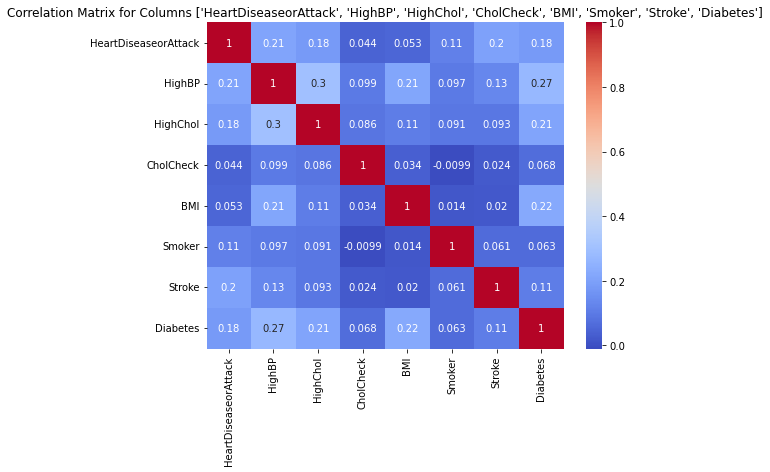

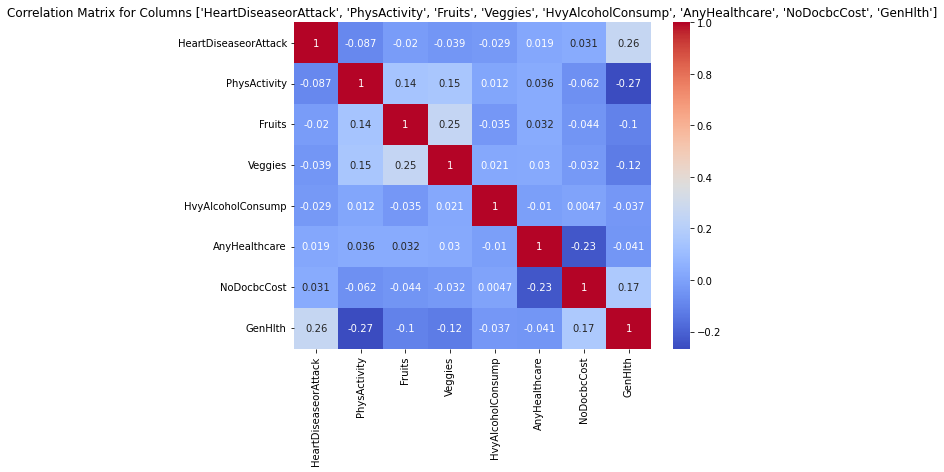

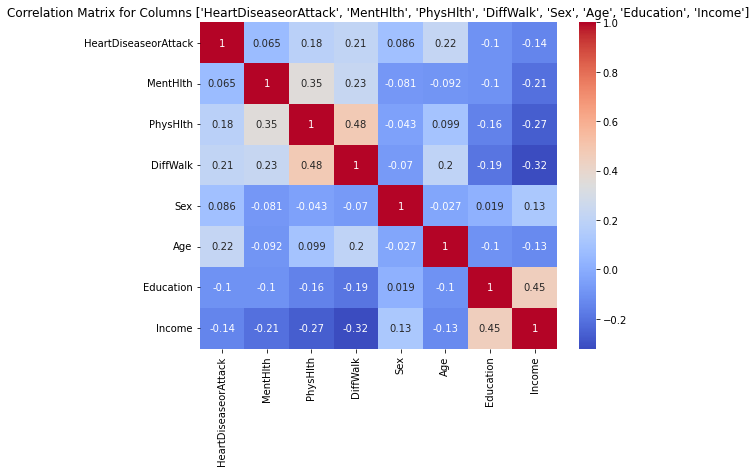

In [4]:
# Check correlation between "heart_attack" and other columns in groups of 7
target_col = "HeartDiseaseorAttack"
num_cols = len(data.columns) - 1  # Subtract 1 for the target column
num_groups = num_cols // 7   # Divide by 7 and round up to get number of groups

for i in range(num_groups):
    cols = [target_col] + data.columns[i*7+1:(i+1)*7+1].tolist()
    corr_matrix = data[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Matrix for Columns {cols}")
    plt.show()

columns to drop HighChol             0.180765
CholCheck            0.044206
BMI                  0.052904
Smoker               0.114441
Diabetes             0.180272
PhysActivity        -0.087299
Fruits              -0.019790
Veggies             -0.039167
HvyAlcoholConsump   -0.028991
AnyHealthcare        0.018734
NoDocbcCost          0.031000
MentHlth             0.064621
PhysHlth             0.181698
Sex                  0.086096
Education           -0.099600
Income              -0.141011
Name: HeartDiseaseorAttack, dtype: float64
number of columns to drop 16


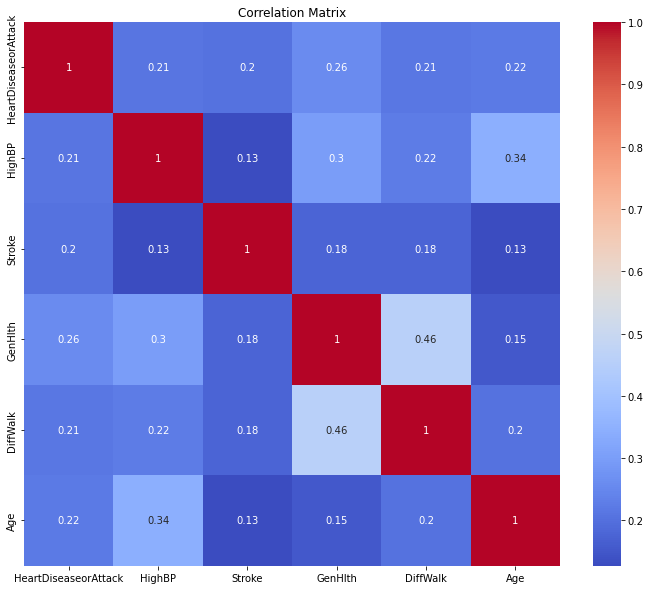

In [5]:
# Calculate correlations between all columns and the target variable
correlations = data.corr()['HeartDiseaseorAttack'].drop('HeartDiseaseorAttack')
data_for_correlation = data
# Drop columns with correlation < 0.02
cols_to_drop = correlations[abs(correlations) < 0.2].index
col_to_drop_names = []
for i in cols_to_drop:
    col_to_drop_names.append(data[i])
data_for_correlation.drop(cols_to_drop, axis=1, inplace=True)
print(f'columns to drop {correlations[abs(correlations)<0.2]}')
print(f'number of columns to drop {len(cols_to_drop)}')


#plot the new correlations :
corr_matrix = data_for_correlation.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title(f"Correlation Matrix")
plt.show()

In [6]:
# Split data into training and testing sets and checking the percentage of positive Y values in Y column
X = data.drop(target_col, axis=1)
y = data[target_col]
one_amount = len(y[y==1])
zero_amount = len(y[y==0])
one_value_percentage = round(one_amount/len(data),2)*100
zero_value_percentage = round(zero_amount/len(data),2)*100
print(f'amount of Y data with value 1 : {one_amount}')
print(f'amount of Y data with value 0 : {zero_amount}')
print(f'percentage of one values in y column is {one_value_percentage}%')
print(f'percentage of zero values in y column is {zero_value_percentage}%')

amount of Y data with value 1 : 23893
amount of Y data with value 0 : 229787
percentage of one values in y column is 9.0%
percentage of zero values in y column is 91.0%


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100,200,300]
}

# Create a random forest classifier
rf = RandomForestClassifier()

# Create a grid search object with 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True)
grid_search = GridSearchCV(rf, param_grid, cv=cv)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'n_estimators': 300}
Best score:  0.9068068048823685


In [16]:
# creating the model with the best params 
rfc = RandomForestClassifier(n_estimators=300, random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [17]:
#Make predictions on testing data
y_pred = rfc.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [18]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9076986754966887


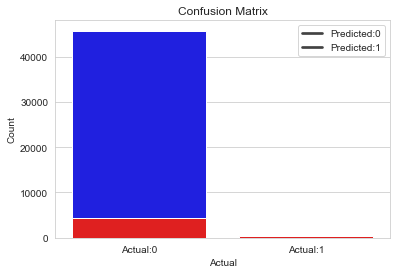

In [19]:
# Plot the confusion matrix with bars
cm = confusion_matrix(y_test, y_pred)
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.barplot(x=["Actual:0", "Actual:1"], y=cm[0], color="b")
sns.barplot(x=["Actual:0", "Actual:1"], y=cm[1], color="r")
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Count")
plt.legend(["Predicted:0", "Predicted:1"])
plt.show()

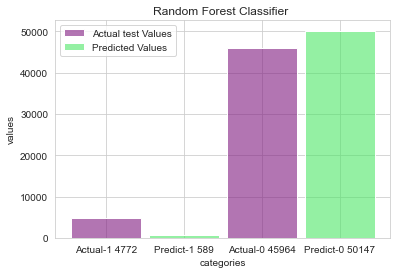

In [20]:

test_one =0
test_zero = 0
for test in y_test :
    if test == 1:
        test_one = test_one +1
    else :
        test_zero = test_zero +1
total_test = [test_one,test_zero]

predict_zero=0
predict_one = 0
for test in y_pred :
    if test == 1:
        predict_one = predict_one +1
    else :
        predict_zero = predict_zero +1
total_predict = [predict_one,predict_zero]


position_test = [1,3]
position_predict = [2,4]
plt.bar(position_test, total_test, width=0.9, color = (0.5,0.1,0.5,0.6), label = "Actual test Values")
plt.bar(position_predict, total_predict, width = 0.9, color = (0.3,0.9,0.4,0.6), label = "Predicted Values")
plt.title("Random Forest Classifier ")
plt.xlabel('categories')
plt.ylabel('values')
positions = [1,2,3,4]
plt.xticks(positions, (f'Actual-1 {test_one}',f'Predict-1 {predict_one}',f'Actual-0 {test_zero}',f'Predict-0 {predict_zero}') )
plt.legend()
plt.show()